In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Amazon Fine Food Reviews Analysis¶
Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

Number of reviews: 568,454
Number of users: 256,059
Number of products: 74,258
Timespan: Oct 1999 - Oct 2012
Number of Attributes/Columns in data: 10

Attribute Information:

Id
ProductId - unique identifier for the product
UserId - unqiue identifier for the user
ProfileName
HelpfulnessNumerator - number of users who found the review helpful
HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
Score - rating between 1 and 5
Time - timestamp for the review
Summary - brief summary of the review
Text - text of the review
Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).


[Q] How to determine if a review is positive or negative?


[Ans] We could use the Score/Rating. A rating of 4 or 5 could be cosnidered a positive review. A review of 1 or 2 could be considered negative. A review of 3 is nuetral and ignored. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.

Loading the data
The dataset is available in two forms

.csv file
SQLite Database
In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently.

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

###  we already strored the preprocessed_data in a file to know the preprocessing steps visit <a href='https://github.com/Sachin-D-N/Amazon_Food_Reviews/blob/main/01.Amazon_Fine_Food_Review_Analysis_Featurization/Amazon%20Fine%20Food%20Reviews%20Analysis.ipynb'>here </a>

In [2]:
#loading the preprocessed_data
data=pd.read_csv('preprocessed_data.csv',nrows=25000)

In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_reviews,preprocessed_summary
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educ
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...,love book miss hard cover version
2,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...,chicken soup rice month
3,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read aloud nice rhythm well g...,good swingi rhythm read aloud
4,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...,great way learn month


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
Id                        25000 non-null int64
ProductId                 25000 non-null object
UserId                    25000 non-null object
ProfileName               24999 non-null object
HelpfulnessNumerator      25000 non-null int64
HelpfulnessDenominator    25000 non-null int64
Score                     25000 non-null int64
Time                      25000 non-null int64
Summary                   24999 non-null object
Text                      25000 non-null object
preprocessed_reviews      25000 non-null object
preprocessed_summary      24907 non-null object
dtypes: int64(5), object(7)
memory usage: 2.3+ MB


In [5]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,283829.126960,2.616200,3.234720,0.848160,1.264441e+09
std,160268.109214,9.125476,10.065458,0.358873,7.021914e+07
min,11.000000,0.000000,0.000000,0.000000,9.393408e+08
25%,149819.750000,0.000000,0.000000,1.000000,1.213747e+09
50%,276397.500000,1.000000,1.000000,1.000000,1.284682e+09
75%,424337.250000,2.000000,3.000000,1.000000,1.323994e+09
max,568418.000000,466.000000,488.000000,1.000000,1.351210e+09


In [6]:
data['Score'].value_counts()

1    21204
0     3796
Name: Score, dtype: int64

In [7]:
#importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

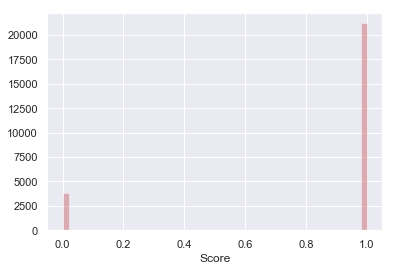

In [8]:
#plotting of value counts
sns.set()
sns.distplot(data['Score'], kde = False,color="r")

In [9]:
#sorting the data with reppect to time
data=data.sort_values('Time',ascending=True,axis=0)

In [10]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_reviews,preprocessed_summary
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educ
30,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...,whole seri great way spend time child
424,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...,entertainingl funni
330,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...,modern day fairi tale
423,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...,fantast


In [11]:
data.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_reviews,preprocessed_summary
6518,379063,B0000V1B3E,A3PKAVKWFFT0GC,FinGurBang,0,0,0,1351209600,Want To Pay $31.51 Lb For Loose Tea That's Med...,"Holy cow, when I placed my order for 24 indivi...",holi cow place order individu packet assum pac...,want pay loos tea mediocr best look
11605,157173,B0001IOSCM,A25YYMCNXA2RC0,Libbia,0,0,1,1351209600,Simple and Authentic,This is a fantastic do-it-yourself poke produc...,fantast poke product add sesam oil green onion...,simpl authent
15226,295923,B0002DGL26,A3SZ0N66423CE5,Cynthia Z. Wrinn,0,0,0,1351209600,plastic chew,Puppy didn't care for this. Older dog chews on...,puppi not care older dog chew not sure much ge...,plastic chew
11519,542900,B0001HAEJY,A289SYWE4BHCF,akilah,0,0,1,1351209600,Great!,"Very good product, great for your blood! You w...",good product great blood love aim wonder produ...,great
9663,237940,B00018CWN4,A37264CFSSA73O,Andrea,0,0,1,1351209600,Great quality!,This product is very good and I won't change i...,product good not chang brand nor vendor made c...,great qualiti


In [12]:
#use preprocessed_reviews and score for building a model
X=data['preprocessed_reviews'].values
Y=data['Score'].values

In [13]:
print(X.shape)
print(Y.shape)

(25000,)
(25000,)


In [14]:
X

array(['witti littl book make son laugh loud recit car drive along alway sing refrain learn whale india droop rose love new word book introduc silli classic book will bet son still abl recit memori colleg',
       'rememb see show air televis year ago child sister later bought day thirti someth use seri book song student teach preschool turn whole school purchas along book children tradit live',
       'beetlejuic well written movi everyth excel act special effect delight chose view movi',
       ...,
       'puppi not care older dog chew not sure much get chew digest not crazi',
       'good product great blood love aim wonder product would definit order product everyth came time manner free damag',
       'product good not chang brand nor vendor made chipa tast delici'],
      dtype=object)

In [15]:
#define a function for splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,shuffle=False)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(17500,) (17500,)
(7500,) (7500,)


In [16]:
X_train

array(['witti littl book make son laugh loud recit car drive along alway sing refrain learn whale india droop rose love new word book introduc silli classic book will bet son still abl recit memori colleg',
       'rememb see show air televis year ago child sister later bought day thirti someth use seri book song student teach preschool turn whole school purchas along book children tradit live',
       'beetlejuic well written movi everyth excel act special effect delight chose view movi',
       ...,
       'messi sift litter creat lot dust goe right nose also pan low near entranc result lot spill litter final process disassembl sift reassembl take longer scoop use pan someth els',
       'peppercorn arriv time seal air tight thick plastic bag cook regular basi home think tellicherri peppercorn best black pepper tast got varieti peppercorn year ago grinder forgot miss got huge suppli awesom peppercorn stew grinder product probabl size restaur would buy smell tast amaz share neighbor',

In [17]:
X_test

array(['agre previous review note tast pickl pesto exact thought upon tast tast like combin pickl oliv not ined combin not one expect particular want part made almost ined salt come someon enjoy process food top salti go throw stuff away shelf stabl pesto nice idea refriger varieti way',
       'love tea hard time find store thrill found avail subscrib save unfortun even first order gone item discontinu not give lot faith subsrib save order specif hard find item',
       'favorit noodl bowl time delish piec top deep fri tempura batter littl veggi piec lot flavor well someth like garlic onion whatev definit yummi noodl differ averag noodl bowl well noodl made buckwheat whole wheat look one great thing bowl season packet divid two section one base broth anoth spicy way get spice level right tast great broth not over salti like final point awesom noodl bowl name transalt green raccoon that cute',
       ...,
       'puppi not care older dog chew not sure much get chew digest not crazi',
 

## Featurization using TFIDF Vectorizer

In [18]:
BOW=CountVectorizer(ngram_range=(2,3),min_df=10)
X_train_Bow=BOW.fit_transform(X_train)
X_test_Bow=BOW.transform(X_test)
print(X_train_Bow.shape,Y_train.shape)
print(X_test_Bow.shape,Y_test.shape)

(17500, 6826) (17500,)
(7500, 6826) (7500,)


In [19]:
import pickle
pickle.dump(BOW, open('vectorizer.pkl','wb'))

In [20]:
#compute best alpha using hyperparameter tuning 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

cv=KFold(n_splits=5) #defining the K-fold cross validation
alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
model=MultinomialNB()
parameters = {'alpha':alpha_values}
clf = GridSearchCV(model,parameters, cv=cv, scoring='roc_auc',return_train_score=True,verbose=1)
clf.fit(X_train_Bow, Y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [21]:
#defining train and cross_validation

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
best_alpha= clf.best_params_['alpha']

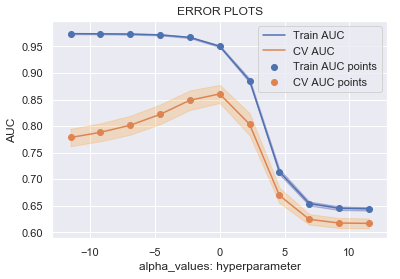

In [22]:
import math

sns.set()
alpha_values=[math.log(x) for x in alpha_values]
plt.plot(alpha_values, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha_values,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha_values, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha_values,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(alpha_values, train_auc, label='Train AUC points')
plt.scatter(alpha_values, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("alpha_values: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [23]:
print("Best cross-validation score: {:.3f}".format(clf.best_score_))
print('The best alpha from gridsearch :',best_alpha)

Best cross-validation score: 0.861
The best alpha from gridsearch : 1


In [24]:
#training the model with best alpha
model=MultinomialNB(alpha=1)
model.fit(X_train_Bow, Y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

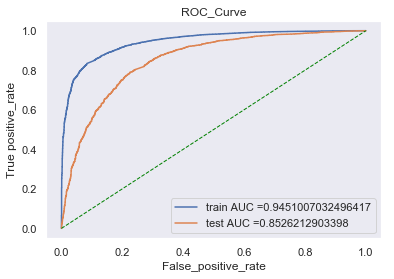

The AUC_score of test_data is : 0.8526212903398


In [25]:
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(Y_train, model.predict_proba(X_train_Bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test_Bow)[:,1])

sns.set()
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
plt.legend()
plt.xlabel("False_positive_rate")
plt.ylabel("True positive_rate")    
plt.title("ROC_Curve")
plt.grid()
plt.show()
print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))


In [26]:
#performance metric
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=MultinomialNB(alpha=0.1)
model.fit(X_train_Bow, Y_train)
predict=model.predict(X_test_Bow)


              precision    recall  f1-score   support

           0       0.67      0.50      0.57      1361
           1       0.90      0.95      0.92      6139

   micro avg       0.86      0.86      0.86      7500
   macro avg       0.78      0.72      0.75      7500
weighted avg       0.85      0.86      0.86      7500



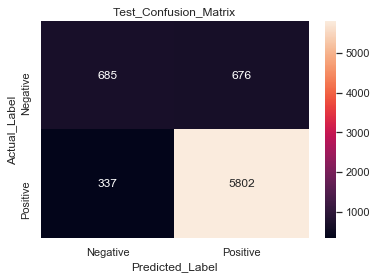

In [27]:
conf_mat = confusion_matrix(Y_test, predict)
class_label = ["Negative", "Positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    
report=classification_report(Y_test,predict)
print(report)
    
sns.set()
sns.heatmap(df, annot = True,fmt="d")
plt.title("Test_Confusion_Matrix")
plt.xlabel("Predicted_Label")
plt.ylabel("Actual_Label")
plt.show()

In [28]:
# Top 10 important features of positive class 
feature_names=BOW.get_feature_names()
model=MultinomialNB(alpha=best_alpha)
model.fit(X_train_Bow, Y_train)
a=getattr(model, 'feature_log_prob_') #Return the value of the named attribute of object. name must be a string. If the string is the name of one of the object’s attributes
top =zip(a[1], feature_names)
top=list(top)
top.sort(key=lambda x: x[0])
l=len(top)
print('\nThe Top 10 Positive Class Features are :\n')
for i in range(1,11):
    print(top[l-i][1],end="\n")


The Top 10 Positive Class Features are :

high recommend
hot sauc
groceri store
dog love
tast like
could not
dog food
not like
year ago
would not


In [29]:
# Top 10 important features of positive class 
feature_names=BOW.get_feature_names()
model=MultinomialNB(alpha=best_alpha)
model.fit(X_train_Bow, Y_train)
a=getattr(model, 'feature_log_prob_') #Return the value of the named attribute of object. name must be a string. If the string is the name of one of the object’s attributes
top =zip(a[0], feature_names)
top=list(top)
top.sort(key=lambda x: x[0])
l=len(top)
print('\nThe Top 10 Positive Class Features are :\n')
for i in range(1,11):
    print(top[l-i][1],end="\n")


The Top 10 Positive Class Features are :

would not
tast like
not even
not buy
could not
dog food
not like
not know
wast money
not good


In [30]:
#save the trained_model in pickle_file

from sklearn.externals import joblib
import pickle

#joblib.dump(tf_idf,open('Vectorizer.pkl','wb')
pickle.dump(model, open('model.pkl','wb'))

In [31]:
vect=pickle.load(open('vectorizer.pkl','rb'))
model=pickle.load(open('model.pkl','rb'))

In [32]:
from bs4 import BeautifulSoup
import re


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [33]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [34]:
def clean_text(sentance):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    return sentance.strip()

In [35]:
def predict(string):
   # clf = pickle.load('model.pkl')
   # count_vect = pickle.load('vectorizer.pkl')
    review_text= decontracted(string)
    review_text = clean_text(string)
    test_vect = vect.transform(([review_text]))
    pred = model.predict(test_vect)
    print(pred[0])
    if pred[0]:
        prediction = "Positive"
    else:
        prediction = "Negative"
    return prediction


print(predict("its  good to buy,  buy this,waste of money"))

1
Positive


In [36]:
predict("bad product don't buy this")

0


'Negative'